In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [303]:
df = pd.read_csv('train.csv')
df.shape

(8693, 14)

In [304]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [305]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [306]:
df1 = df.drop(['PassengerId','Name'],axis=1)
df1.shape

(8693, 12)

In [307]:
df1.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [308]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [309]:
df1.Cabin = df1.Cabin.astype('str')

In [310]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([^/]+$)", input_text)
    return pattern.group(1)

In [311]:
df1['Cabin_side'] = df1.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [312]:
df1.drop(['Cabin'],axis=1,inplace=True)

In [313]:
df1.Cabin_side.replace('nan',np.NAN,inplace=True)

In [314]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 7 numerical variables

The numerical variables : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [315]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 5 categorical variables

The categorical variables : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side']


In [316]:
df1[numerical].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [317]:
df1[categorical].isnull().sum()

HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
Cabin_side     199
dtype: int64

In [318]:
df1[categorical]=df1[categorical].fillna(df1[categorical].mode().iloc[0])

In [319]:
df1[categorical].isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Cabin_side     0
dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

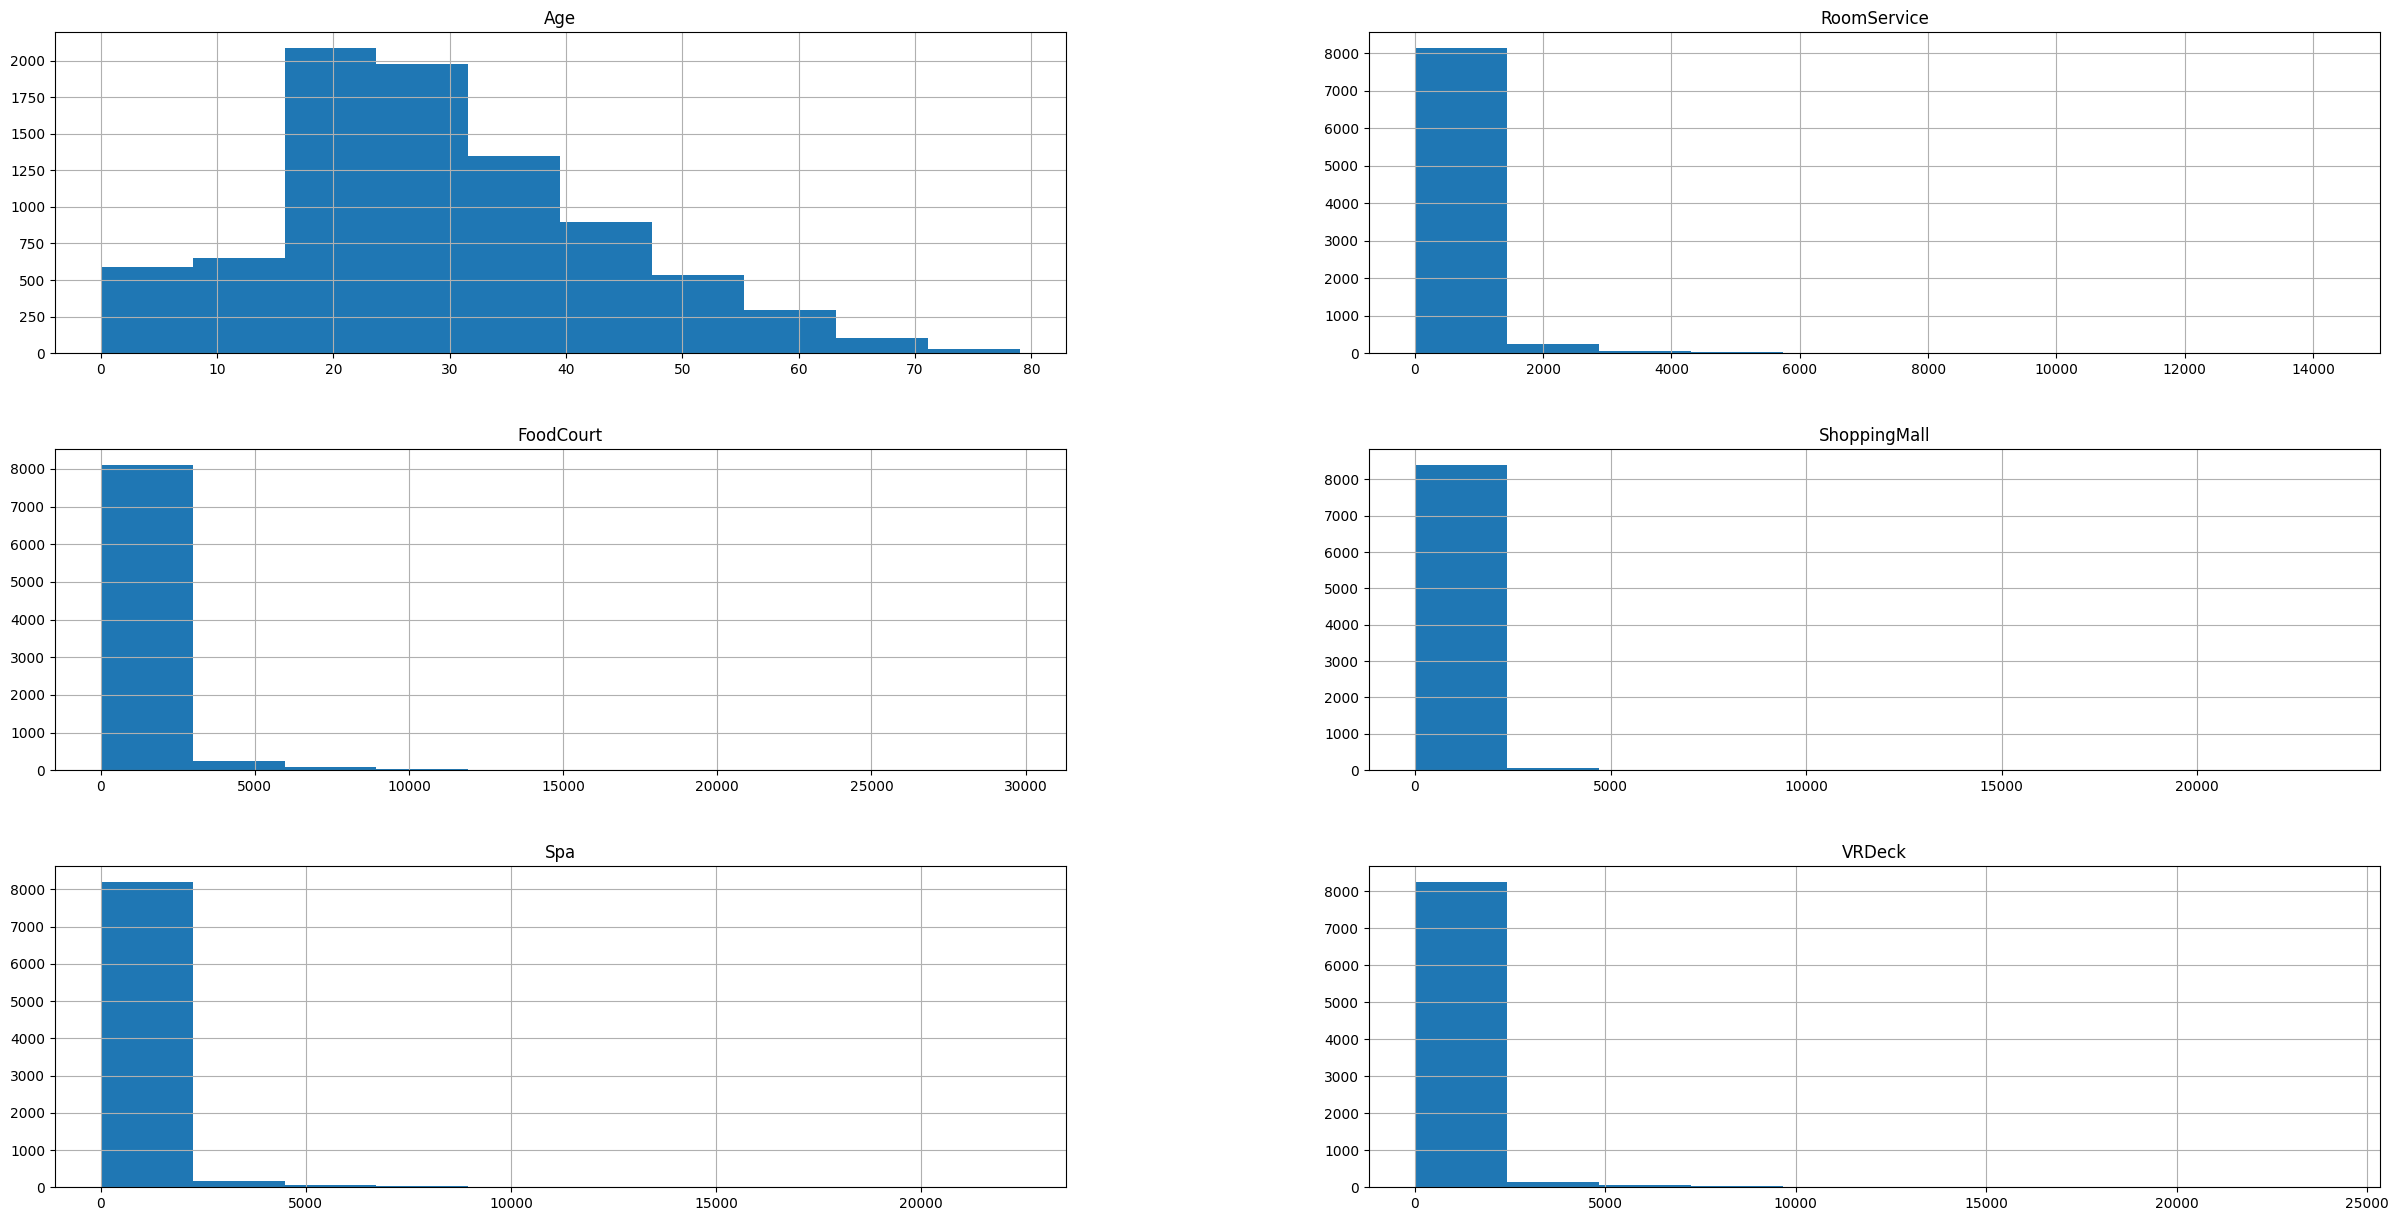

In [320]:
df1[numerical].hist(figsize=(30,15))

In [321]:
df1[numerical].shape

(8693, 7)

In [322]:
df1.Age = df1.Age.fillna(df1.Age.median())

In [323]:
df1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=df1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [324]:
df1[numerical].shape

(8693, 7)

In [325]:
df1[numerical].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [327]:
df1[categorical].head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_side
0,Europa,False,TRAPPIST-1e,False,P
1,Earth,False,TRAPPIST-1e,False,S
2,Europa,False,TRAPPIST-1e,True,S
3,Europa,False,TRAPPIST-1e,False,S
4,Earth,False,TRAPPIST-1e,False,S


In [328]:
df1[categorical].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
Cabin_side     2
dtype: int64

In [329]:
df2 = pd.get_dummies(data=df1,columns=categorical,drop_first=True)
df1.shape, df2.shape

((8693, 12), (8693, 14))

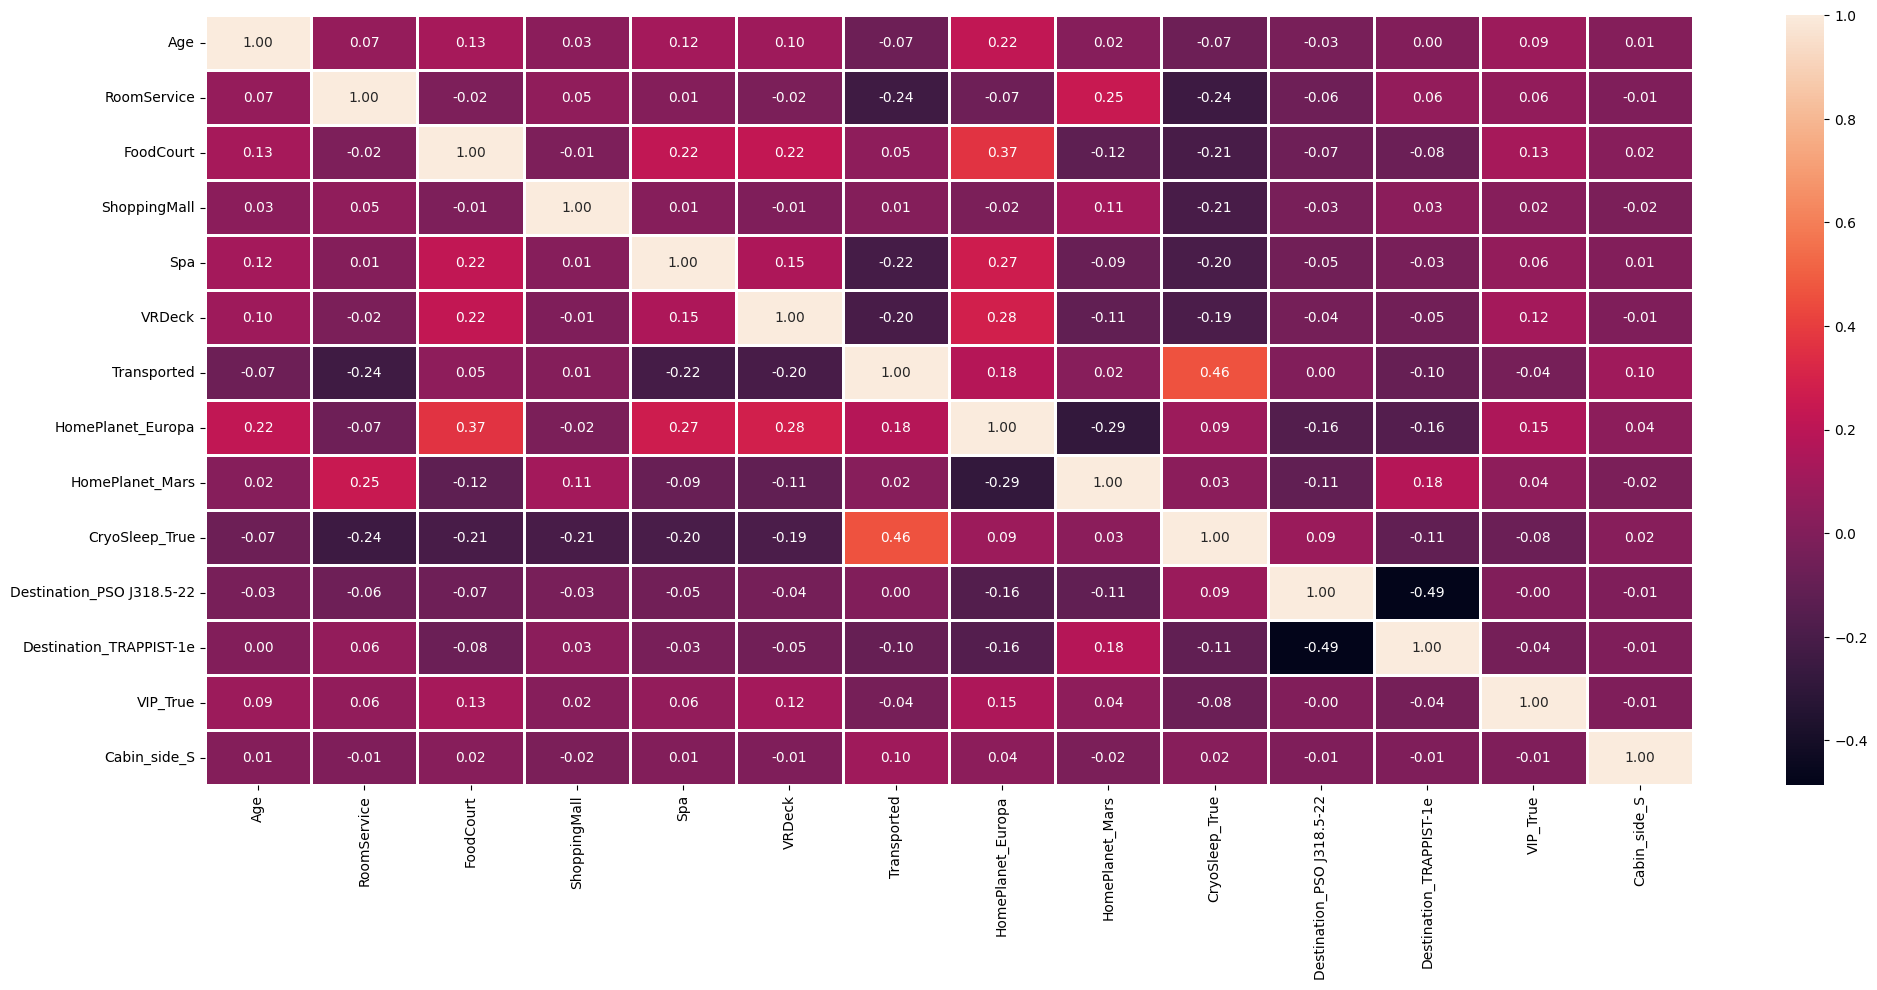

In [330]:
plt.figure(figsize=(24,10))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [331]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df2[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

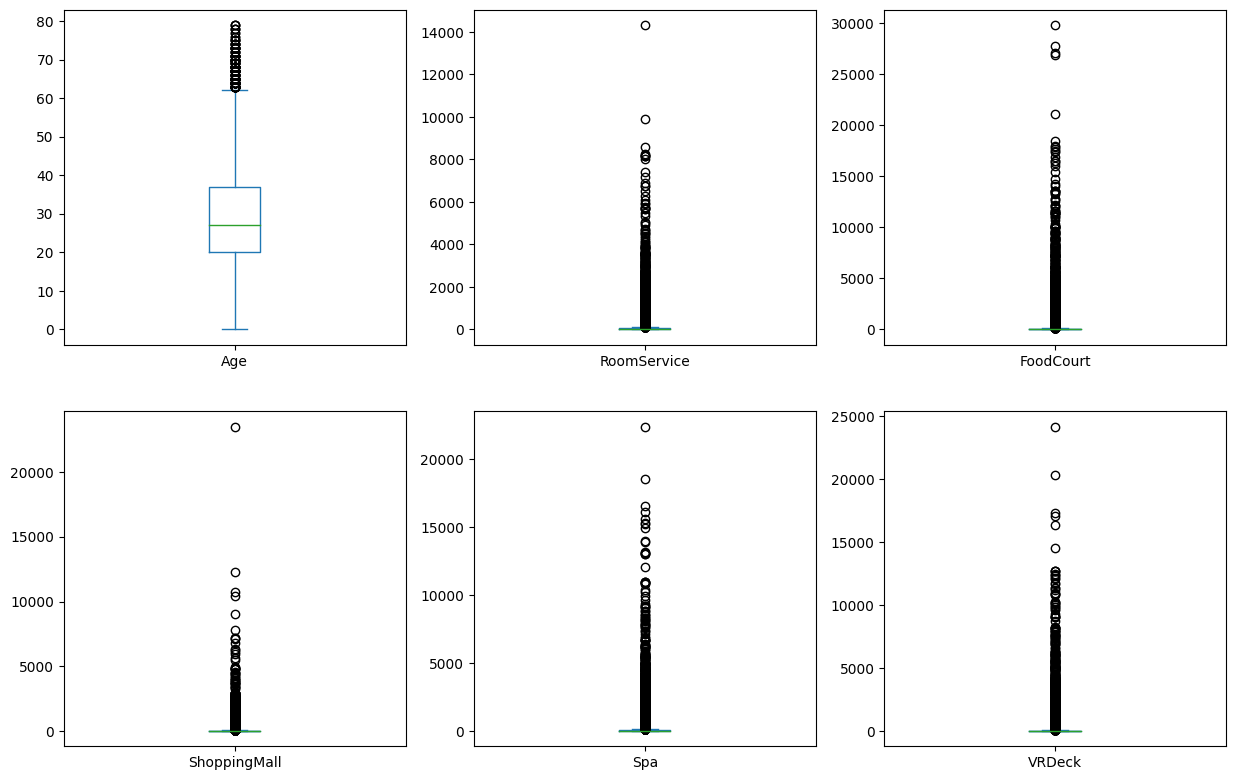

In [332]:
df2[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [333]:
rem_list = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [334]:
df3 = treat_outliers_all(df2 , rem_list)

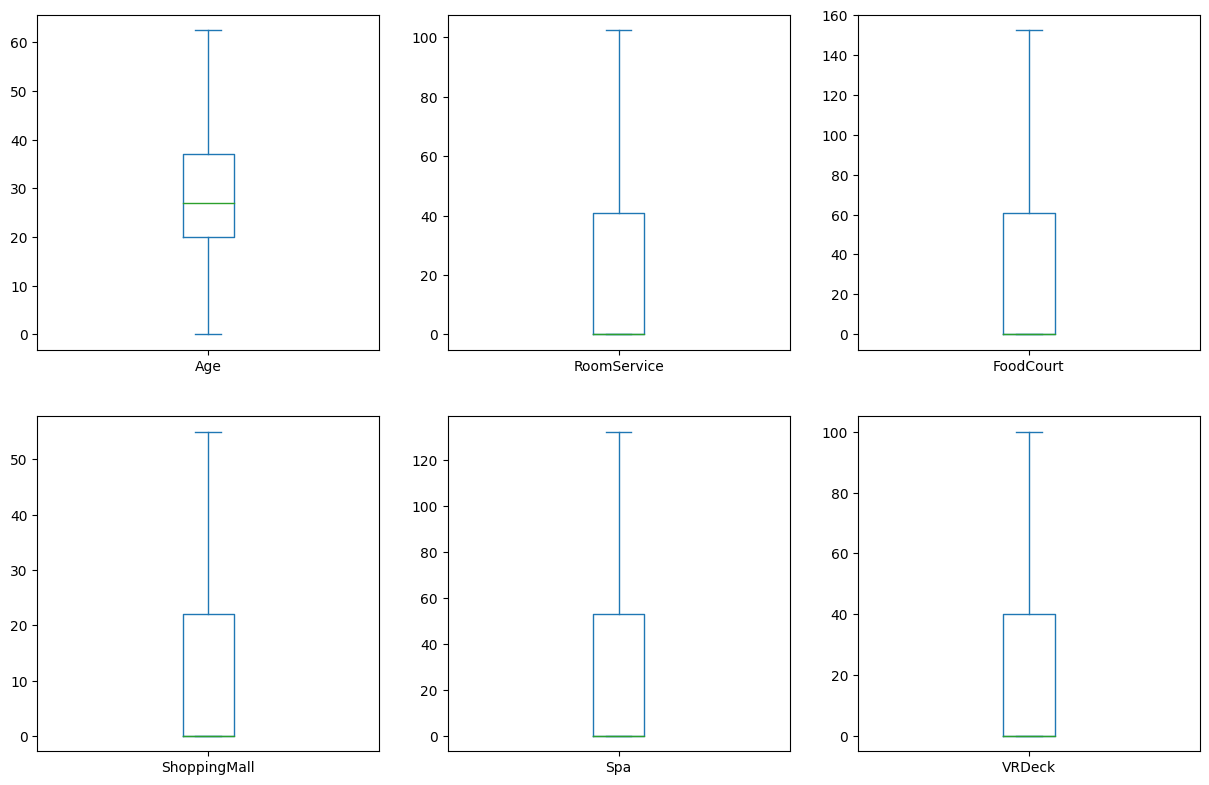

In [335]:
df3[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [336]:
df2.Transported.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [337]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   HomePlanet_Europa          8693 non-null   uint8  
 8   HomePlanet_Mars            8693 non-null   uint8  
 9   CryoSleep_True             8693 non-null   uint8  
 10  Destination_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_TRAPPIST-1e    8693 non-null   uint8  
 12  VIP_True                   8693 non-null   uint8  
 13  Cabin_side_S               8693 non-null   uint8

Feature Engineering

In [338]:
X = df2.drop(['Transported'],axis=1)
y = df2.Transported

X.shape, y.shape

((8693, 13), (8693,))

In [339]:
y.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 13), (1739, 13), (6954,), (1739,))

In [341]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [342]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [343]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.7666
Test set score: 0.7665


In [344]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2','elasticnet']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_RF, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\shara\AppData\Local\Programs\Python

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'solver': ['liblinear', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [345]:
print('Training set score: {:.4f}'.format(grid_search.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test_RF, y_test)))

Training set score: 0.7666
Test set score: 0.7660


Using KNN

In [346]:
from math import sqrt
print(sqrt(X_train.shape[1]))

3.605551275463989


In [347]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=10,cv=3)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV 1/3; 1/49] START n_neighbors=1..............................................
[CV 1/3; 1/49] END ...............n_neighbors=1;, score=0.689 total time=   0.0s
[CV 2/3; 1/49] START n_neighbors=1..............................................
[CV 2/3; 1/49] END ...............n_neighbors=1;, score=0.698 total time=   0.0s
[CV 3/3; 1/49] START n_neighbors=1..............................................
[CV 3/3; 1/49] END ...............n_neighbors=1;, score=0.679 total time=   0.0s
[CV 1/3; 2/49] START n_neighbors=2..............................................
[CV 1/3; 2/49] END ...............n_neighbors=2;, score=0.701 total time=   0.0s
[CV 2/3; 2/49] START n_neighbors=2..............................................
[CV 2/3; 2/49] END ...............n_neighbors=2;, score=0.686 total time=   0.0s
[CV 3/3; 2/49] START n_neighbors=2..............................................
[CV 3/3; 2/49] END ...............n_neighbors=2

In [348]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.7685
Test set score: 0.7562


Random Forests

In [349]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7332


In [350]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9146
Test set score: 0.7332


In [351]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.7493


In [352]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9328
Test set score: 0.7493


Gridsearch RF

In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [354]:
y_pred = clf.predict(X_test_RF)

In [355]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8125
Test set score: 0.7717


In [356]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

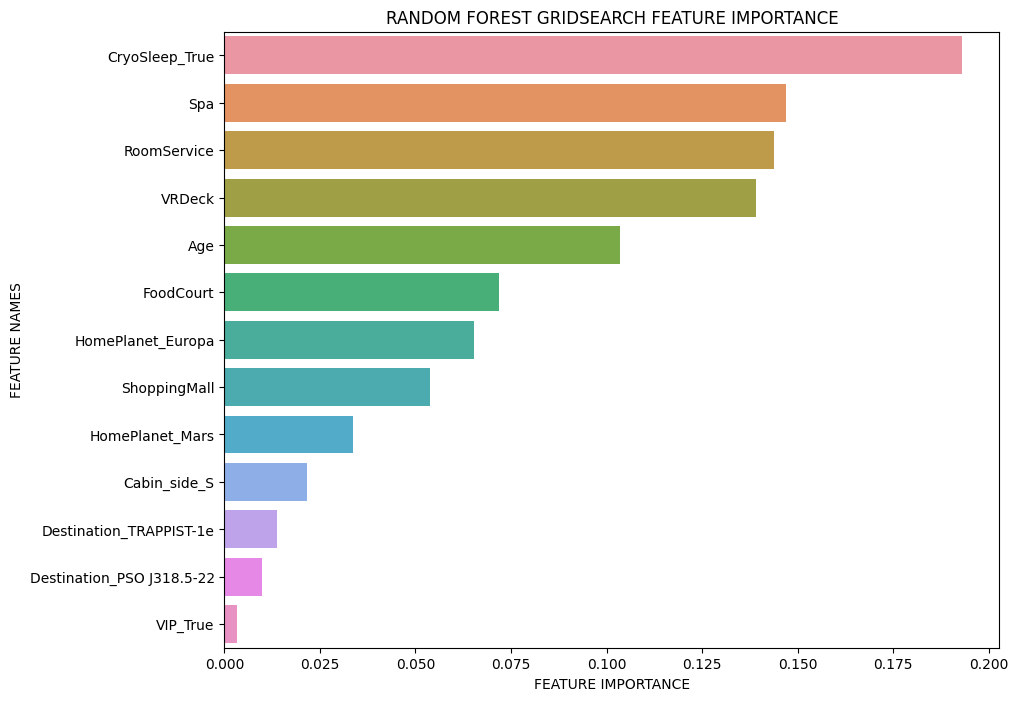

In [357]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

CNN

In [358]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [359]:
space_model = Sequential()
space_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
space_model.add(Dense(512, activation = "relu"))
space_model.add(Dense(1024, activation = "relu"))
space_model.add(Dropout(0.2))
space_model.add(Dense(1024, activation = "relu"))
space_model.add(Dense(512, activation = "relu"))
space_model.add(Dense(256, activation = "relu"))
space_model.add(Flatten())
space_model.add(Dense(512, activation = "relu"))
space_model.add(Dropout(0.5))
space_model.add(Dense(512, activation = "relu"))
space_model.add(Dropout(0.5))
# space_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
space_model.add(Dense(1, activation = "sigmoid"))
space_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3584      
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)              

In [360]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
space_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [432]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [433]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='space_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [434]:
history=space_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=5, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100
   6/1113 [..............................] - ETA: 23s - loss: 0.4808 - accuracy: 0.8000

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1109/1113 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.7663
Epoch 1: val_accuracy improved from -inf to 0.77930, saving model to space_model.h5
1113/1113 [==============================] - 5s 4ms/step - loss: 0.5161 - accuracy: 0.7669 - val_loss: 0.6441 - val_accuracy: 0.7793
Epoch 2/100
1110/1113 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7650
Epoch 2: val_accuracy did not improve from 0.77930
1113/1113 [==============================] - 4s 4ms/step - loss: 0.5400 - accuracy: 0.7652 - val_loss: 0.5181 - val_accuracy: 0.7620
Epoch 3/100
1099/1113 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7674
Epoch 3: val_accuracy did not improve from 0.77930
1113/1113 [==============================] - 4s 4ms/step - loss: 0.5306 - accuracy: 0.7681 - val_loss: 0.4942 - val_accuracy: 0.7743
Epoch 4/100
1106/1113 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7649
Epoch 4: val_accuracy did not i

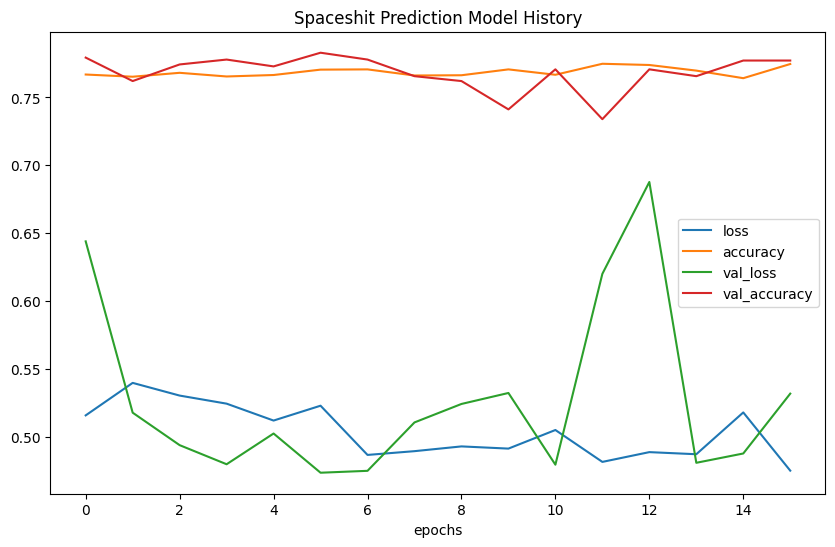

In [435]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Spaceshit Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [436]:
print("Evaluate space_model against trained data")
score = space_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (space_model.metrics_names[1], score[1]*100))

print("Evaluate space_model against test data")
score = space_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (space_model.metrics_names[1], score[1]*100))

Evaluate space_model against trained data
score accuracy: 77.75%
Evaluate space_model against test data
score accuracy: 75.33%


On test data

In [366]:
test_data = pd.read_csv('test.csv')
test_data.shape

(4277, 13)

In [367]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [368]:
test_df = test_data.drop(['PassengerId','Name'],axis=1)
test_df.shape

(4277, 11)

In [369]:
test_df.Cabin = test_df.Cabin.astype('str')
test_df['Cabin_side'] = test_df.apply(lambda row: use_regex(row['Cabin']),axis=1)
test_df.drop(['Cabin'],axis=1,inplace=True)
test_df.Cabin_side.replace('nan',np.NAN,inplace=True)

In [370]:
numerical = [var for var in test_df.columns if test_df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 6 numerical variables

The numerical variables : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [371]:
categorical = [var for var in test_df.columns if test_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 5 categorical variables

The categorical variables : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side']


In [372]:
test_df[numerical].isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [373]:
test_df[categorical].isnull().sum()

HomePlanet      87
CryoSleep       93
Destination     92
VIP             93
Cabin_side     100
dtype: int64

In [374]:
test_df[categorical]=test_df[categorical].fillna(df1[categorical].mode().iloc[0])

In [375]:
test_df[categorical].isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Cabin_side     0
dtype: int64

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

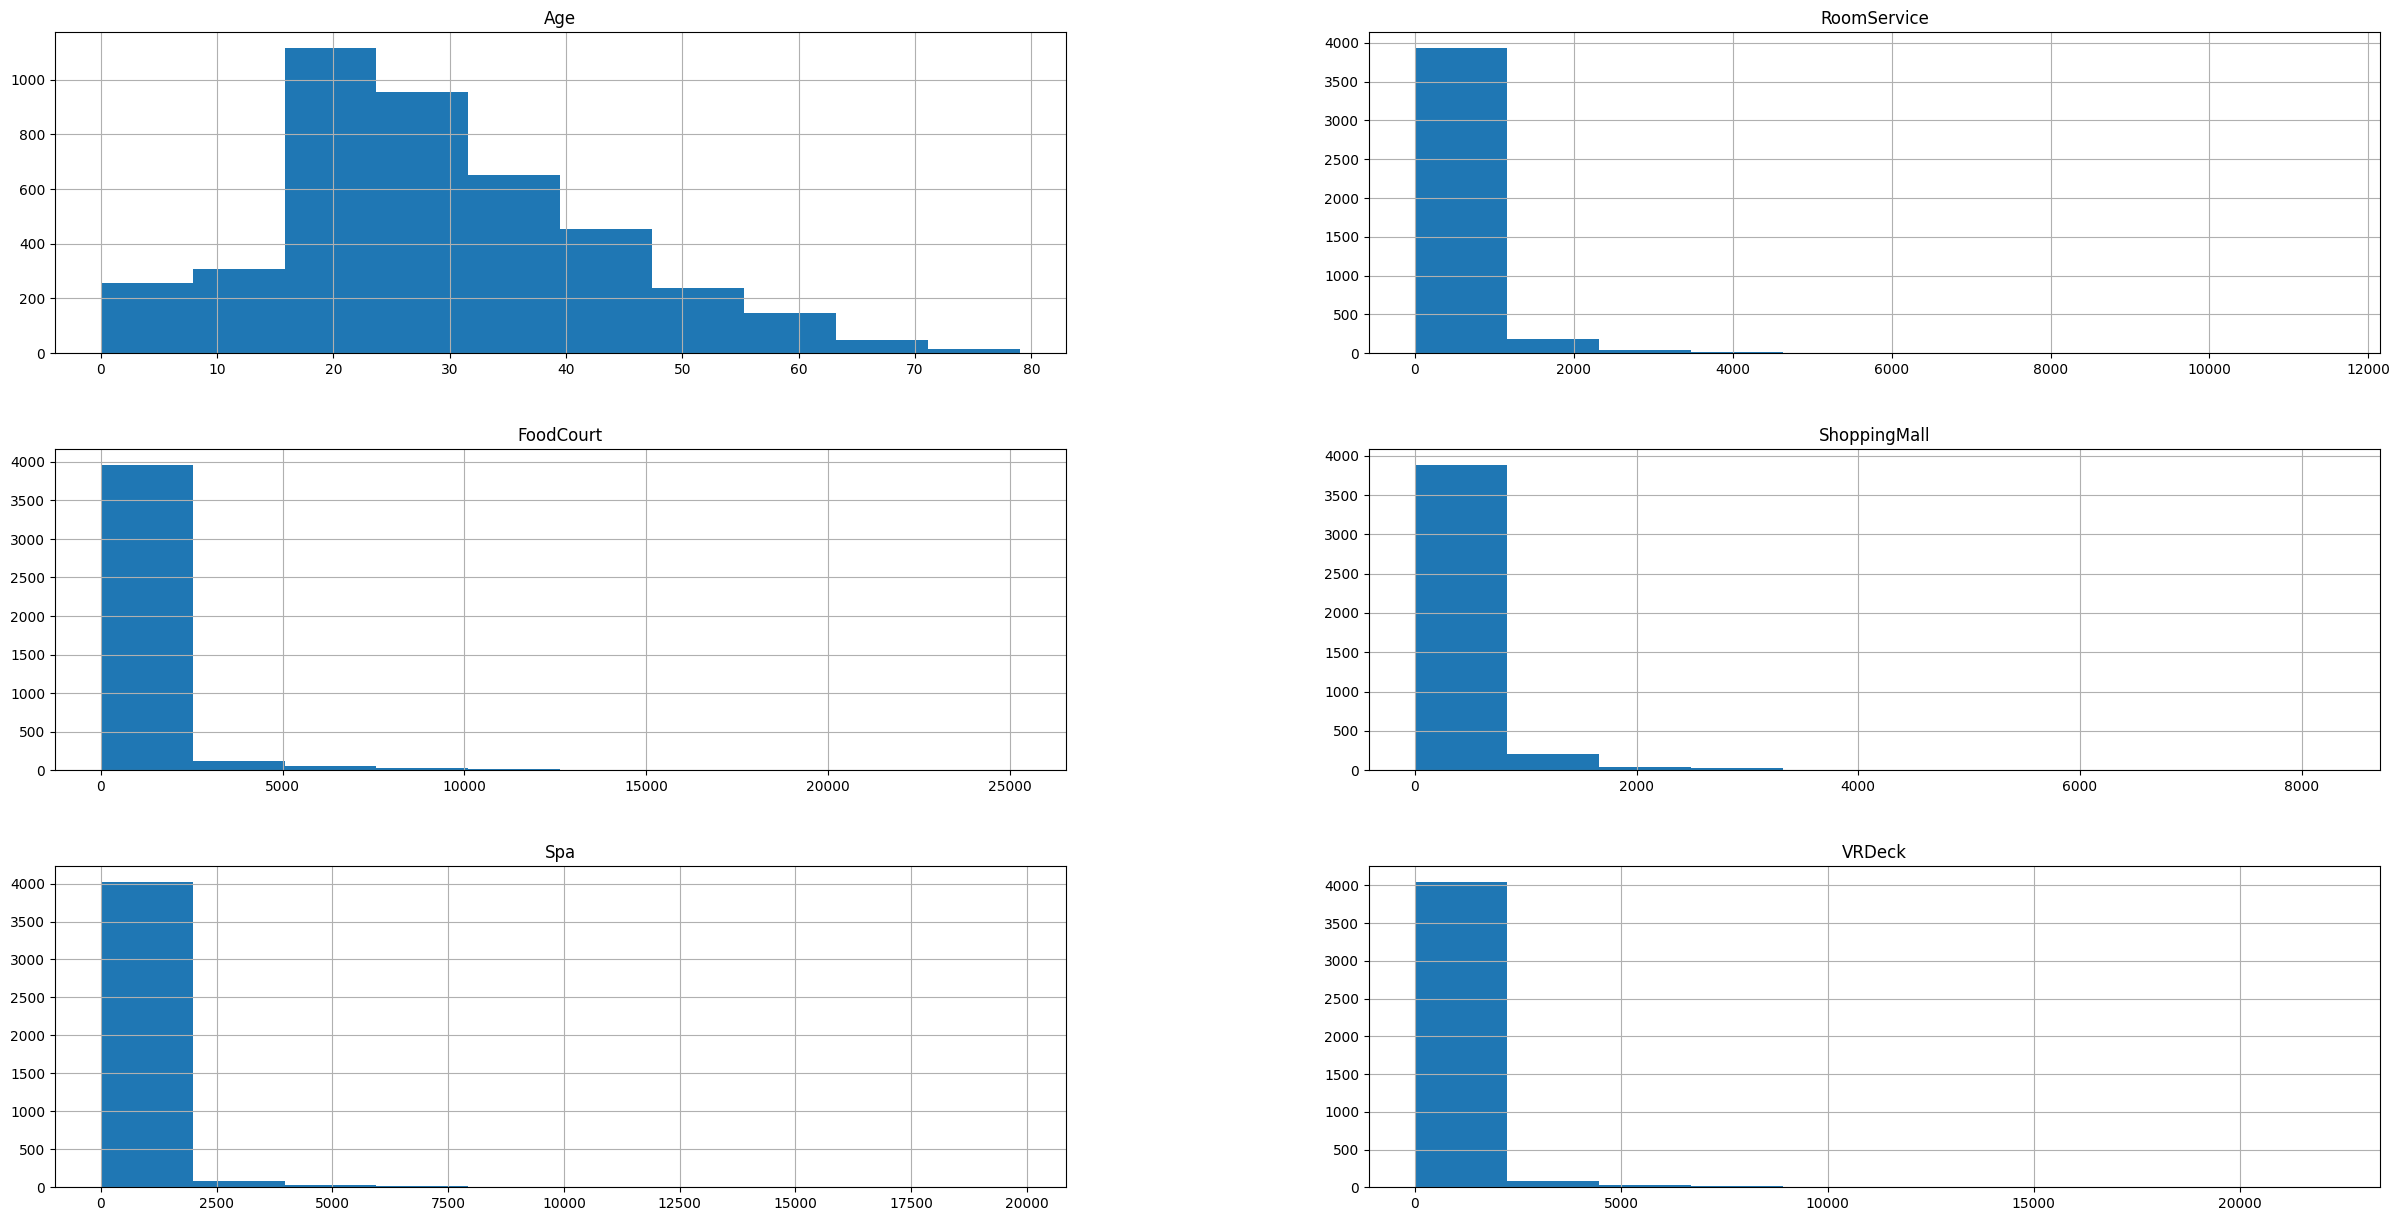

In [376]:
test_df[numerical].hist(figsize=(30,15))

In [377]:
test_df[numerical].shape

(4277, 6)

In [389]:
test_df.Age = test_df.Age.fillna(df1.Age.median())

In [390]:
test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [391]:
test_df[numerical].shape

(4277, 6)

In [392]:
test_df[numerical].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [393]:
test_df[categorical].head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_side
0,Earth,True,TRAPPIST-1e,False,S
1,Earth,False,TRAPPIST-1e,False,S
2,Europa,True,55 Cancri e,False,S
3,Europa,False,TRAPPIST-1e,False,S
4,Earth,False,TRAPPIST-1e,False,S


In [394]:
test_df[categorical].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
Cabin_side     2
dtype: int64

In [395]:
test_df_2 = pd.get_dummies(data=test_df,columns=categorical,drop_first=True)
test_df.shape, test_df_2.shape

((4277, 11), (4277, 13))

In [396]:
test_df_2.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'Cabin_side_S'],
      dtype='object')

In [397]:
cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True',
       'Cabin_side_S'],
      dtype='object')

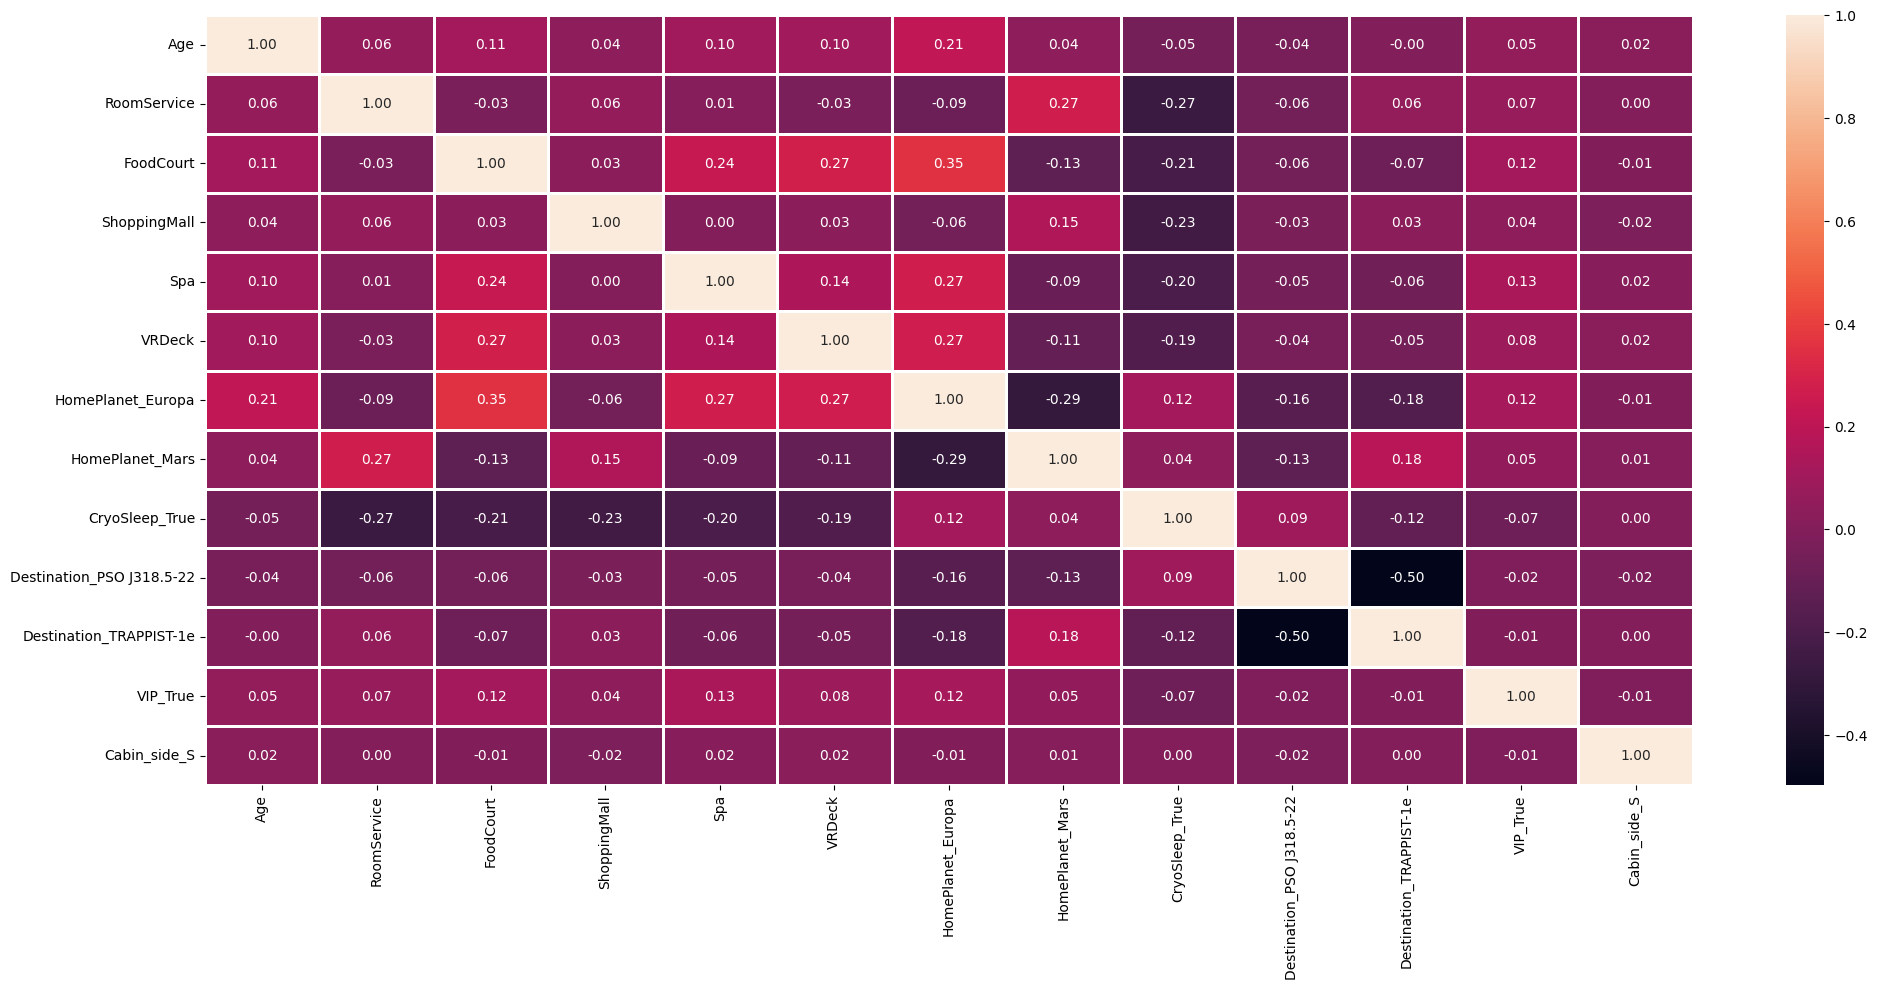

In [398]:
plt.figure(figsize=(24,10))
sns.heatmap(test_df_2.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [399]:
test_df_2_RF = scaler.fit_transform(test_df_2)
test_df_2_RF = pd.DataFrame(test_df_2_RF,columns=cols)

In [400]:
y_pred_test = logreg.predict(test_df_2)
y_pred_test

array([False, False, False, ..., False,  True, False])

In [401]:
final_df = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Transported':y_pred_test})

In [402]:
final_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,True
4,0023_01,True


In [403]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [404]:
final_df.to_csv('Predictions_new.csv',index=False)

RF

In [405]:
y_pred_test = clf.predict(test_df_2)
y_pred_test

array([ True, False,  True, ...,  True, False,  True])

In [406]:
final_df = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Transported':y_pred_test})

In [407]:
final_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [408]:
final_df.to_csv('Predictions_new_RFcv.csv',index=False)

CNN

In [437]:
y_pred = space_model.predict(test_df_2_RF)

134/134 [==============================] - 0s 3ms/step


In [438]:
y_pred

array([[0.6429683 ],
       [0.40483192],
       [0.9361617 ],
       ...,
       [0.950649  ],
       [0.8289387 ],
       [0.6344643 ]], dtype=float32)

In [439]:
# extract the predicted probabilities
p_pred = space_model.predict(test_df_2_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

134/134 [==============================] - 0s 1ms/step
[0.64 0.4  0.94 ... 0.95 0.83 0.63]


In [440]:
y_pred = np.where(p_pred > 0.5, True, False)
print(y_pred)

[ True False  True ...  True  True  True]


In [441]:
final_df = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Transported':y_pred})

In [442]:
final_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [415]:
final_df.to_csv('Predictions_new_CNN.csv',index=False)